# # Census Income 

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year. 

Description of fnlwgt (final weight) 

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are: 

A single cell estimate of the population 16+ for each state. 

Controls for Hispanic Origin by age and sex. 

Controls by Race, age and sex. 

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state. 

Dataset Link- 

 
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv 

In [8]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [9]:
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"


cens=pd.read_csv (url)

In [10]:
cens.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [11]:
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# Total number of records
n_records = cens.shape[0]

# Total number of features
n_features = cens.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = cens[cens['Income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = cens[cens['Income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32560
Total number of features: 15
Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


# Data Cleaning

In [13]:
# drop uneeded columns
cens.drop('Education', inplace=True, axis=1)
cens.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

- We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.

The matching education level of the education number:

**1**: Preschool, **2**: 1st-4th, **3**: 5th-6th, **4**: 7th-8th, **5**: 9th, **6**: 10th, **7**: 11th, **8**: 12th, **9**: HS-grad,

**10**: Some-college, **11**: Assoc-voc, **12**: Assoc-acdm, **13**: Bachelors, **14**: Masters, **15**: Prof-school, **16**: Doctorate

In [14]:
# check for nulls
cens.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- It appears that there are no null values occurred in the dataset.

In [15]:
# check duplicates and remove it
print("Before removing duplicates:", cens.duplicated().sum())

cens = cens[~cens.duplicated()]

print("After removing duplicates:", cens.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


- There are 24 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.

In [16]:
# before discarding
cens.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [17]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    cens[column] = cens[column].str.strip()

In [18]:
# after discarding
cens.Sex.value_counts()

Male      21774
Female    10762
Name: Sex, dtype: int64

- Discarding the spaces from the entries of the dataset, for easier access.

In [19]:
# before changing "?"
cens.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [20]:
# changing "?" to Unknown
change_columns = ['Workclass', 'Occupation', 'Native_country']
for column in change_columns:
        cens[column] = cens[column].replace({'?': 'Unknown'})

In [21]:
# after changing "?"
cens.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

- Changing "?" symbol to "Unknown", for better interpretation and cleaner representation.

<a id='explore'></a>
# Data Exploration

In [22]:
# a quick look on some statistics about the data
cens.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


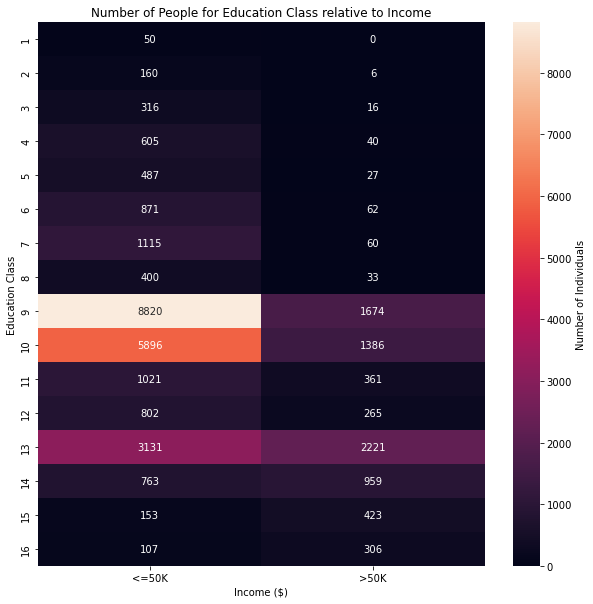

In [23]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = cens.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

- In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

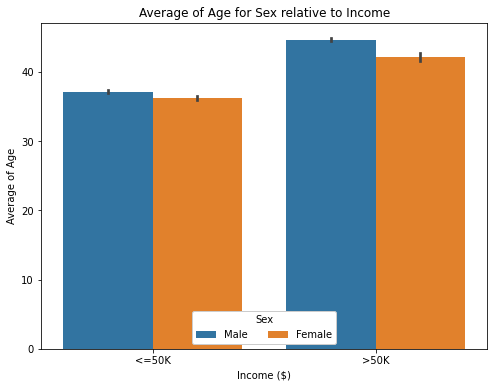

In [24]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = cens, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

- The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

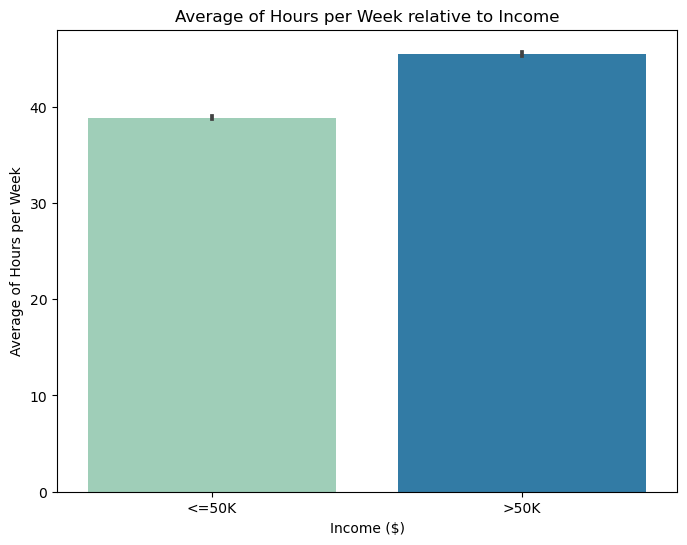

In [90]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=cens, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

- We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

<a id='preprocess'></a>
# Data Preprocessing

In [25]:
cens_prep = cens.copy()

- We have taken a copy of the dataset to maintain the cleaned one for later uses, and to use the copied one for preparing the data for the model.

In [26]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt']

scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [27]:
cens_prep.sample(3)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
24401,0.178082,Local-gov,0.059234,11,Divorced,Protective-serv,Unmarried,Amer-Indian-Eskimo,Female,0.0,0.000000,0.397959,United-States,<=50K
1294,0.123288,Private,0.181883,3,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.373737,0.500000,United-States,<=50K
28138,0.506849,Private,0.108662,14,Divorced,Tech-support,Not-in-family,White,Male,0.0,0.000000,0.397959,United-States,>50K


- The data has been scaled to MinMaxScalling for numerical features, which converts the data to have a range between 0 and 1. That would help to make the data well-prepared for the model.

In [28]:
# Encoding
cens_prep['Sex'] = cens_prep.Sex.replace({"Female": 0, "Male": 1})
cens_prep['Income'] = cens_prep.Income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
cens_prep = pd.get_dummies(cens_prep)

In [29]:
encoded = list(cens_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

92 total features after one-hot encoding.


- We have encoded and created dummy variables using the hot-encoding approach for the categorical features, to make it as numerical data. It helps for easier processing and more numerical representation.

<a id='exp'></a>
# Experimental Process

In the project, the **independent variables** have been chosen as follows:
1. **Age**
2. **Workclass**
3. **Fnlwgt** 
4. **Education_num**
5. **Marital_status**
6. **Occupation**
7. **Relationship** 
8. **Race** 
9. **Sex**
10. **Capital_gain**
11. **Capital_loss**
12. **Hours_per_week**
13. **Native_country**

Also, the **Income** variable is considered to be the **dependent variable**, since it is our concern in this experiment.

In [30]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [31]:
# Partioning the data
X = cens_prep.drop('Income', axis=1)
y = cens_prep['Income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [33]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8499815511186725 | test:  0.849121092135754
F1-score: train:  0.6556767729550794 | test:  0.6542445476534728
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999615813131507 | test:  0.8560363955832541
F1-score: train:  0.9999202666283136 | test:  0.6743388413519347
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.861115379558884 | test:  0.8602165848720997
F1-score: train:  0.681746966054651 | test:  0.679097227079003
---------------------------------------------------------


- As it appears from the exploration in our dataset that there is an imbalance between the classes of classifications. Since the individuals making more than 50k as income represent 75% of the data. So, we would try to make oversampling.